In [29]:
import numpy as np
from conf_exp6 import *
%pylab inline
import seaborn
import matplotlib.pyplot as plt
import utils.img_utils as iu


def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [12]:
parameter_name = 'gamma'
formula = 'f1'
base_folder = './results/exp6/%s/%s/'%(formula, parameter_name)
rango = params_range[parameter_name]
#rango = np.arange(100, 1001, 100)

GROUPS=5
FITS=10
RANGO=len(rango)
print rango 

mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
a = np.zeros((RANGO), dtype='float')

name_tmp1 = base_folder + 'mse_g%d_f%d'+'.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d'+'.npy'
for group in xrange(GROUPS):
    #if group==0 : continue
    for fit in xrange(FITS):
        print 'loading', name_tmp1%(group, fit)
        tmp = np.load(name_tmp1%(group, fit))
        a = a + tmp
        mse[:, fit, group] = tmp
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))

a = a / (FITS*GROUPS)
        
print mse.shape


[  1.00000000e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01]
loading ./results/exp6/f1/gamma/mse_g0_f0.npy
loading ./results/exp6/f1/gamma/mse_g0_f1.npy
loading ./results/exp6/f1/gamma/mse_g0_f2.npy
loading ./results/exp6/f1/gamma/mse_g0_f3.npy
loading ./results/exp6/f1/gamma/mse_g0_f4.npy
loading ./results/exp6/f1/gamma/mse_g0_f5.npy
loading ./results/exp6/f1/gamma/mse_g0_f6.npy
loading ./results/exp6/f1/gamma/mse_g0_f7.npy
loading ./results/exp6/f1/gamma/mse_g0_f8.npy
loading ./results/exp6/f1/gamma/mse_g0_f9.npy
loading ./results/exp6/f1/gamma/mse_g1_f0.npy
loading ./results/exp6/f1/gamma/mse_g1_f1.npy
loading ./results/exp6/f1/gamma/mse_g1_f2.npy
loading ./results/exp6/f1/gamma/mse_g1_f3.npy
loading ./results/exp6/f1/gamma/mse_g1_f4.npy
loading ./results/exp6/f1/gamma/mse_g1_f5.npy
loading ./results/exp6/f1/gamma/mse_g1_f6.npy
loading ./results/exp6/f1/gamma/mse_g1_f7.np

In [13]:
print parameter_name
print rango
mean= mse.mean(axis=2).mean(axis=1)
var = np.std(np.std(mse, axis=2), axis=1)
print 'mean', mean
print 'var', var
print 'mean=',mean#, var.shape

#print mse[:, 0 , 0]
#print mse[:, 0 , 1]
#print mse[:, 0 , 2]

acum = np.zeros(10)
n =0
for f in xrange(10):
    for g in xrange(5):
        acum = acum + mse[:, f, g]
        n=n+1


mean2 = acum/n


print mean
print mean2


gamma
[  1.00000000e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01]
mean [  9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08]
var [  1.73093632e+09   1.73093632e+09   1.73093632e+09   1.73093632e+09
   1.73093632e+09   1.73093632e+09   1.73093632e+09   1.73093632e+09
   1.73093632e+09   1.73093632e+09]
mean= [  9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08]
[  9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08]
[  9.50460002e+08   9.50460068e+08   9.50460068e+08   9.50460068e+08
   9.50460068e+08   9.50460068e+08   9.5

In [14]:
print rango
mean1000 = mse1000.mean(axis=2).mean(axis=0)
var1000 = np.std(np.std(mse1000, axis=2), axis=0)
print mean1000
print var1000

[  1.00000000e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01]
[  5.09110848e+08   1.99786395e-01   1.80070668e-01   5.86307704e-01
   1.02316916e-01   1.52733261e+09   3.83624858e+09   3.82238720e+09
   1.39600563e+00   1.32581174e-01]
[  2.02385769e+01   4.12481138e-03   1.15667423e-03   4.17055376e-03
   1.06009748e-03   1.45942459e+02   5.12000000e+02   1.61908615e+02
   2.00307858e-03   6.08883891e-03]


In [15]:
print rango
mean2000 = mse2000.mean(axis=2).mean(axis=1)
var2000 = np.std(np.std(mse2000, axis=2), axis=1)

print mean2000
print var2000

[  1.00000000e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01]
[  8.05257856e+08   8.05257856e+08   8.05257856e+08   8.05257856e+08
   8.05257856e+08   8.05257856e+08   8.05257856e+08   8.05257856e+08
   8.05257856e+08   8.05257856e+08]
[  1.67625958e+09   1.67625958e+09   1.67625958e+09   1.67625958e+09
   1.67625958e+09   1.67625958e+09   1.67625958e+09   1.67625958e+09
   1.67625958e+09   1.67625958e+09]


In [16]:
#rango = np.arange(100, 1001, 100)
print mean.shape, rango
mean3000 = mse3000.mean(axis=2).mean(axis=1)
var3000 = np.std(np.std(mse3000, axis=2), axis=1)
print mean3000
print var3000

(10,) [  1.00000000e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01]
[  1.07532250e+09   1.07532262e+09   1.07532262e+09   1.07532262e+09
   1.07532262e+09   1.07532262e+09   1.07532262e+09   1.07532262e+09
   1.07532262e+09   1.07532262e+09]
[  1.83007232e+09   1.83007245e+09   1.83007258e+09   1.83007258e+09
   1.83007258e+09   1.83007258e+09   1.83007258e+09   1.83007258e+09
   1.83007258e+09   1.83007258e+09]


medias= 9.5046e+08 9.69508e+08 8.05258e+08 1.07532e+09
std= 2.52119e+09 2.62875e+09 2.37498e+09 2.71461e+09
mean1000 [  5.09110848e+08   1.99786395e-01   1.80070668e-01   5.86307704e-01
   1.02316916e-01   1.52733261e+09   3.83624858e+09   3.82238720e+09
   1.39600563e+00   1.32581174e-01]
mean2000 [  8.05257856e+08   8.05257856e+08   8.05257856e+08   8.05257856e+08
   8.05257856e+08   8.05257856e+08   8.05257856e+08   8.05257856e+08
   8.05257856e+08   8.05257856e+08]
mean [  9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08   9.50460032e+08   9.50460032e+08
   9.50460032e+08   9.50460032e+08] 9.5046e+08
[  1.00000000e-15   1.00000000e-01   2.00000000e-01   3.00000000e-01
   4.00000000e-01   5.00000000e-01   6.00000000e-01   7.00000000e-01
   8.00000000e-01   9.00000000e-01]


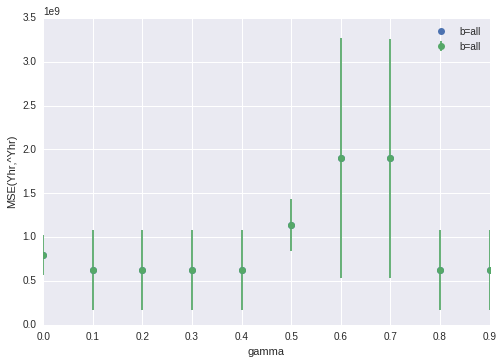

In [20]:

mean3 = np.zeros((10, 3))
mean3[:, 0] = mean1000
mean3[:, 1] = mean2000
mean3[:, 2] = mean3000

#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.plot(rango, mean1000, 'o', label='b=1000')
#plt.plot(rango, mean2000,'o', label='b=2000')
plt.plot(rango, mean3.mean(axis=1),'o', label='b=all')
#plt.plot(rango, mean,'o', label='b=all')

#plt.plot(rango, mean+var,'o', label='b=all')
#plt.plot(rango, mean-var,'o', label='b=all')

#plt.errorbar(rango, mean, yerr=var, fmt='o', label='b=all')
plt.errorbar(rango, mean3.mean(axis=1), yerr=np.std(mean3, axis=1), fmt='o', label='b=all')


plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
#plt.ylim((1102000.0, 1102300.0))
mse[:,2,1]
#print plt.ylim((940000000.0, 960000000.0))

print 'medias=',mse.mean(),mse1000.mean(), mse2000.mean(), mse3000.mean() 
print 'std=',np.std(mse),np.std(mse1000), np.std(mse2000), np.std(mse3000) 
print 'mean1000', mean1000
print 'mean2000', mean2000
print 'mean', mean, mean.min()
print rango
## Para grabar
#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/lamda_mean_var_100a1000.pdf')

In [97]:
## Para grabar
plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/lamda_mean_var_10000a1000000.pdf')

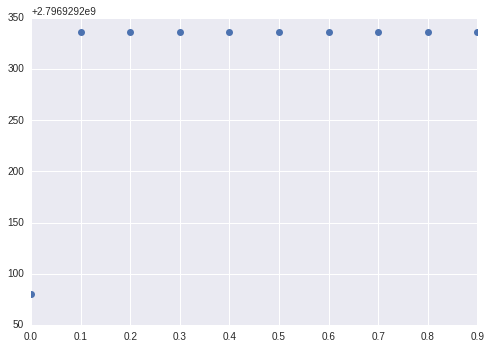

In [39]:
## Para grabar
g=4
for g in xrange(1):
    for i in xrange(1):
        a = plt.plot(rango, mse[:, i, g],'o')
    #plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_g'+str(g)+'_f'+str(i)+'.png')
    
    
plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_all.png')
    

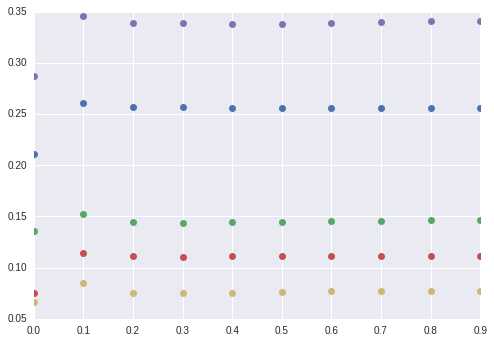

In [56]:
cluster = '1'
if cluster == '0':
    plt.plot(rango, mse[:, 0, 0],'o')
    plt.plot(rango, mse[:, 6, 0],'o')
    plt.plot(rango, mse[:, 7, 0],'o')

if cluster == '1':
    plt.plot(rango, mse[:, 1, 1],'o')
    plt.plot(rango, mse[:, 2, 1],'o')
    #plt.plot(rango, mse[:, 3, 0],'o')
    plt.plot(rango, mse[:, 4, 1],'o')
    plt.plot(rango, mse[:, 5, 1],'o')
    plt.plot(rango, mse[:, 8, 1],'o')



(-0.096077049649437585, 1.4587720278402361)
./results/exp6/f1/gamma/A_g0.
(-1.4520203101102522, 2.5538933991474062)
./results/exp6/f1/gamma/A_g1.
(-0.7368698295440993, 1.96566690073538)
./results/exp6/f1/gamma/A_g2.
(-1.2834682267766888, 2.3764837627582827)
./results/exp6/f1/gamma/A_g3.
(-0.25591047569266068, 2.0657759065865946)
./results/exp6/f1/gamma/A_g4.


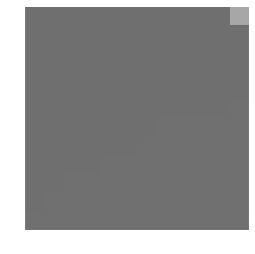

In [36]:
name_tmp3 = base_folder + 'A_g%d.npy'
for g in xrange(5):
    A = np.load(name_tmp3%(g,))
    print mm(A, cast_int=False)
    plt = iu._is(A, vmin=A.min(), vmax=A.max())
    name_img = (name_tmp3%(g))[:-3]
    print name_img
    #plt.savefig(name_img +'png')

(0.0, 4247856.0)
./results/exp6/f1/gamma/i_hr_g0.
(0.0014216572, 11.320087)
./results/exp6/f1/gamma/i_hr_g1.
(0.010446665, 13.940907)
./results/exp6/f1/gamma/i_hr_g2.
(0.0, 5.4029918)
./results/exp6/f1/gamma/i_hr_g3.
(0.047580611, 2.7080669)
./results/exp6/f1/gamma/i_hr_g4.


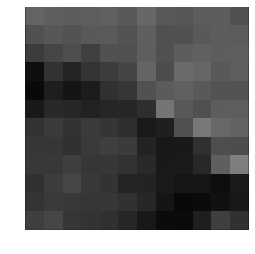

In [35]:
name_tmp4 = base_folder + 'i_hr_g%d.npy'
for g in xrange(5):
    A = np.load(name_tmp4%(g,))
    print mm(A, cast_int=False)
    plt = iu._is(A, vmin=A.min(), vmax=A.max())
    name_img = (name_tmp4%(g))[:-3]
    print name_img
    plt.savefig(name_img +'png')

./results/exp6/f1/gamma/cmp_g0
./results/exp6/f1/gamma/cmp_g1
./results/exp6/f1/gamma/cmp_g2
./results/exp6/f1/gamma/cmp_g3
./results/exp6/f1/gamma/cmp_g4


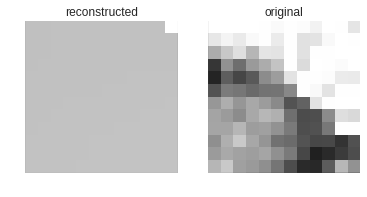

In [39]:
name_tmp4 = base_folder + 'i_hr_g%d.npy'
for g in xrange(5):
    A = np.load(name_tmp3%(g,))
    i_hr = np.load(name_tmp4%(g,))
    #print mm(A, cast_int=False)
    plt = iu._isc(A,i_hr, vmin=0, vmax=1, titles=['reconstructed', 'original'])
    name_img = base_folder + ('cmp_g%d'%(g))
    print name_img
    plt.savefig(name_img +'.png')

In [9]:
i_hr = np.load(base_folder+'i_hr_g0.npy')
A910000 = np.load(base_folder+'A_g0_lamda910000.npy')
iu._isc(A910000,i_hr, vmax=1.4)
A910000.min(), A910000.max(), A910000.shape
del(A100)

IOError: [Errno 2] No such file or directory: './results/exp6/f1/gamma/A_g0_lamda910000.npy'

(0.0, 2729.8464)

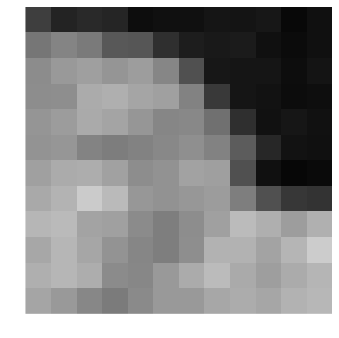

In [16]:
iu._is(i_hr, vmax=2729)
i_hr.min(),i_hr.max()

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

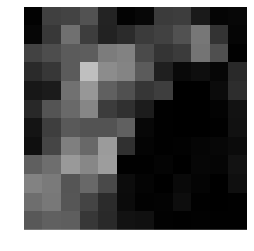

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda1000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

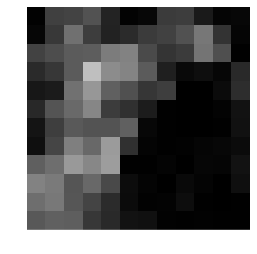

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda3000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

In [30]:
alala = []
for val in rango :
    alala.append(val)
    
print alala

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
